In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

In [2]:
X, y = make_classification(n_features=2, n_classes = 2,hypercube=False,n_clusters_per_class=1, n_informative=1, n_redundant=0, random_state=4)


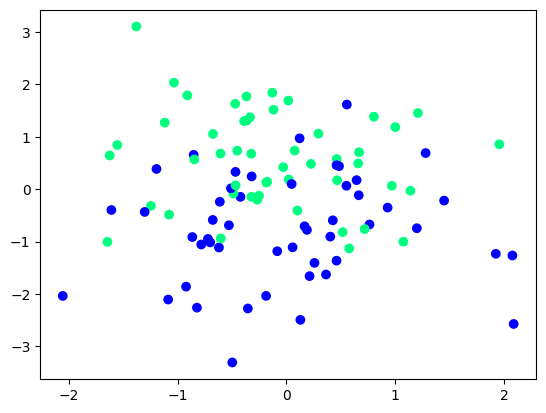

In [3]:
plt.scatter(X[:,0],X[:,1] , cmap= 'winter' , c = y)
plt.show()

In [4]:
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [5]:
from mlxtend.plotting import plot_decision_regions

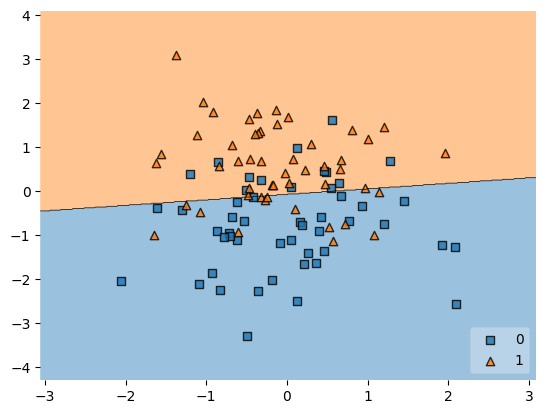

In [6]:
plot_decision_regions(X,y.astype(int),lor,legend=4)
plt.show()
# legend=n , means the 4 corner of the plot. 
# 1: T-R , 2: T-L , 3: B-L , 4: B-R

In [7]:
from sklearn.model_selection import cross_val_score
print(np.mean(cross_val_score(lor , X , y,scoring='accuracy',cv=10)))

0.72


In [8]:
from sklearn.preprocessing import PolynomialFeatures
ploy = PolynomialFeatures(degree=3 , include_bias=False)
X_trf = ploy.fit_transform(X)

In [9]:
clf1 = LogisticRegression()
np.mean(cross_val_score(clf1,X_trf,y,scoring='accuracy',cv=10))

0.67

In [22]:
def plot_decision_boundary(X, y, degree=1):
    
    poly = PolynomialFeatures(degree=degree)
    X_trf = poly.fit_transform(X)
    
    lor = LogisticRegression()
    lor.fit(X_trf, y)  # Fit the logistic regression model to the data
    
    accuracy =  np.mean(cross_val_score(lor, X_trf, y, cv=10, scoring='accuracy'))
    print('Accuracy Score is :: ', accuracy)
    
    a = np.arange(start=X[:, 0].min() - 1, stop=X[:, 0].max() + 1, step=0.01)
    b = np.arange(start=X[:, 1].min() - 1, stop=X[:, 1].max() + 1, step=0.01)
    
    XX, YY = np.meshgrid(a, b)
    input_array = np.array([XX.ravel(), YY.ravel()]).T
    
    labels = lor.predict(poly.transform(input_array))
    
    plt.contourf(XX, YY, labels.reshape(XX.shape), alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title('Degree = {}, accuracy is {}'.format(degree, np.round(accuracy, 4)))


Accuracy Score is ::  0.67


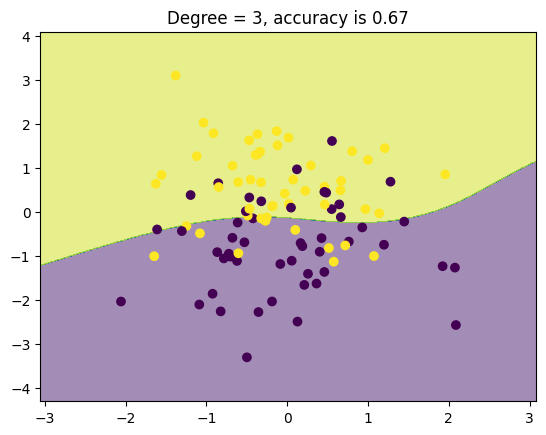

In [25]:
plot_decision_boundary(X,y , degree=3)
plt.show()